# Redes Bayesianas
Las redes Bayesianas corresponden a un caso particular de factorización de una probabilidad conjunto en que cada factor es también una distribución.

El criterio para detectar independencia entre condicional en un grafo probabilístico corresponde a la d-separación, que nos dice que si $x_i$ y $x_j$ están bloqueados por un subconjunto $S \in X \setminus \{x_i,x_j\}$ de las variables, entonces $x_i$ es independiente de $x_j$ dado $S$. Esto nos lleva también a concluir que en un árbol, cada variable $x_i$ es independiente de sus hijos y sus abuelos, dado el valor de las variables en el conjunto $S$ que contiene a sus padres.


En general, podemos decir que podemos garantizar que $x_i \perp x_j \vert S$,si no existe ninguna ruta activa entre ambos vertices. Una ruta se dice activa si todas las tripletas que la componen se encuentran activas.

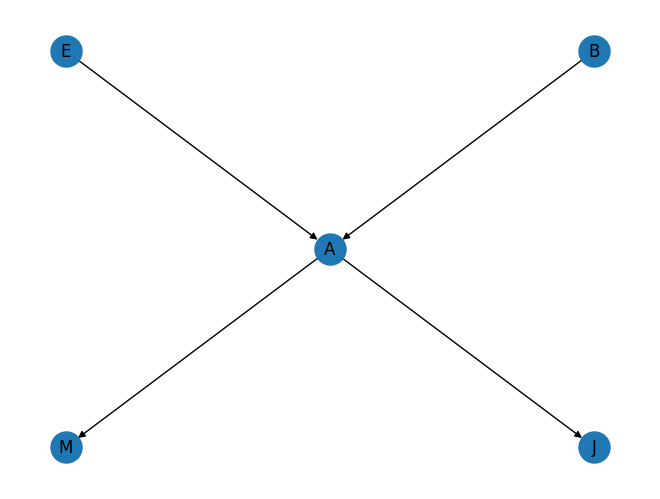

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()
G.add_edges_from([('B','A'),('E','A'),('A','J'),('A','M')])
pos={'A': (0,0),'B':(1,1),'J': (1,-1),'E': (-1,1),'M':(-1,-1)}
nx.draw(G,pos=pos,node_size=500)
nx.draw_networkx_labels(G,pos)
plt.show()


In [5]:
from networkx.algorithms.d_separation import d_separated

print('Efecto comun')
print('Tripleta inactiva', end = '=> ')
print('B _|_ E     : ',d_separated(G,{'B'},{'E'},{}))

print('Tripleta activa', end = '=> ')
print('B _|_ E | A : ',d_separated(G,{'B'},{'E'},{'A'}))

print('Tripleta activa', end = '=> ')
print('B _|_ E | J : ',d_separated(G,{'B'},{'E'},{'J'}))

print('--------------------')
print('Cadena causal')
print('Tripleta activa', end = '=> ')
print('B _|_ M     : ',d_separated(G,{'B'},{'M'},{}))

print('Tripleta inactiva', end = '=> ')
print('B _|_ M | A : ',d_separated(G,{'B'},{'M'},{'A'}))

print('--------------------')
print('Causa comun')
print('Tripleta activa', end = '=> ')
print('J _|_ M     : ',d_separated(G,{'J'},{'M'},{}))

print('Tripleta inactiva', end = '=> ')
print('J _|_ M | A : ',d_separated(G,{'J'},{'M'},{'A'}))

Efecto comun
Tripleta inactiva=> B _|_ E     :  True
Tripleta activa=> B _|_ E | A :  False
Tripleta activa=> B _|_ E | J :  False
--------------------
Cadena causal
Tripleta activa=> B _|_ M     :  False
Tripleta inactiva=> B _|_ M | A :  True
--------------------
Causa comun
Tripleta activa=> J _|_ M     :  False
Tripleta inactiva=> J _|_ M | A :  True


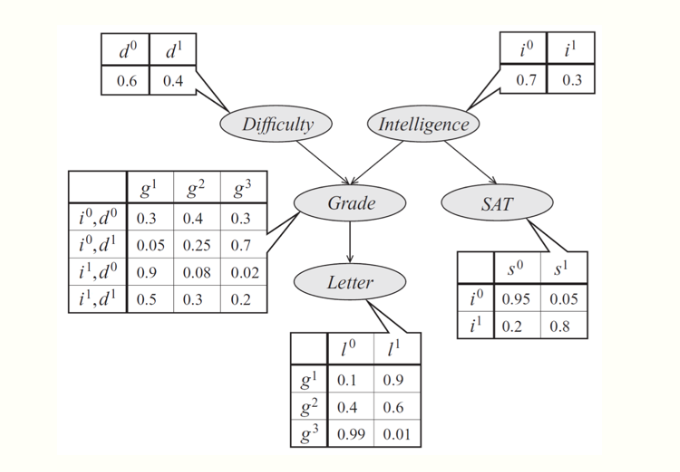

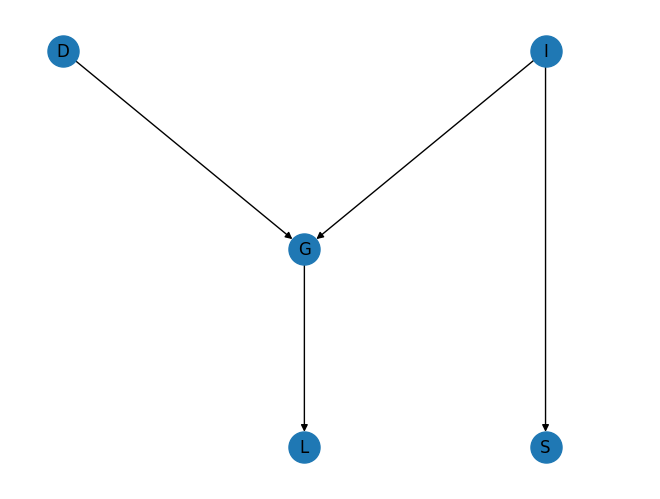

In [16]:
G_sat=nx.DiGraph()
G_sat.add_edges_from([('D','G'),('I','G'),('I','S'),('G','L')])
pos={'G': (0,0),'I':(0.01,0.01),'S': (0.01,-0.01),'D': (-0.01,0.01),'L':(0,-0.01)}
nx.draw(G_sat,pos=pos,node_size=500)
nx.draw_networkx_labels(G_sat,pos)
plt.show()

In [18]:
print('Efecto comun')
print('Tripleta inactiva', end = '=> ')
print('D _|_ I     : ',d_separated(G_sat,{'D'},{'I'},{}))

print('Tripleta activa', end = '=> ')
print('D _|_ I | G : ',d_separated(G_sat,{'D'},{'I'},{'G'}))

print('Tripleta inactiva', end = '=> ')
print('D _|_ I | S,G : ',d_separated(G_sat,{'D'},{'I'},{'S','G'}))

Efecto comun
Tripleta inactiva=> D _|_ I     :  True
Tripleta activa=> D _|_ I | G :  False
Tripleta inactiva=> D _|_ I | S,G :  False


In [20]:
print('--------------------')
print('Cadena causal')
print('Tripleta activa', end = '=> ')
print('D _|_ L     : ',d_separated(G_sat,{'D'},{'L'},{}))

--------------------
Cadena causal
Tripleta activa=> D _|_ L     :  False


In [22]:
print('Cadena causal')
print('Tripleta activa', end = '=> ')
print('D _|_ L  | S   : ',d_separated(G_sat,{'D'},{'L'},{'S'}))

Cadena causal
Tripleta activa=> D _|_ L  | S   :  False


# Probabilistic Graphical Models

In [ ]:
! pip install --user pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pgmpy.models import BayesianNetwork

alarm_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

# Defining the parameters using CPT
from pgmpy.factors.discrete import TabularCPD

cpd_burglary = TabularCPD(
    variable="Burglary", variable_card=2, values=[[0.999], [0.001]]
)
cpd_earthquake = TabularCPD(
    variable="Earthquake", variable_card=2, values=[[0.998], [0.002]]
)
cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)
cpd_johncalls = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.95, 0.1], [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2],
)
cpd_marycalls = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    values=[[0.1, 0.7], [0.9, 0.3]],
    evidence=["Alarm"],
    evidence_card=[2],
)

# Associating the parameters with the model structure
alarm_model.add_cpds(
    cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls
)

In [ ]:
alarm_model.get_independencies()

(JohnCalls ⟂ MaryCalls, Burglary, Earthquake | Alarm)
(JohnCalls ⟂ Burglary, Earthquake | MaryCalls, Alarm)
(JohnCalls ⟂ MaryCalls, Burglary | Alarm, Earthquake)
(JohnCalls ⟂ MaryCalls, Earthquake | Alarm, Burglary)
(JohnCalls ⟂ Burglary | MaryCalls, Alarm, Earthquake)
(JohnCalls ⟂ Earthquake | MaryCalls, Alarm, Burglary)
(JohnCalls ⟂ MaryCalls | Alarm, Earthquake, Burglary)
(MaryCalls ⟂ JohnCalls, Burglary, Earthquake | Alarm)
(MaryCalls ⟂ Burglary, Earthquake | JohnCalls, Alarm)
(MaryCalls ⟂ JohnCalls, Burglary | Alarm, Earthquake)
(MaryCalls ⟂ JohnCalls, Earthquake | Alarm, Burglary)
(MaryCalls ⟂ Burglary | JohnCalls, Alarm, Earthquake)
(MaryCalls ⟂ Earthquake | JohnCalls, Alarm, Burglary)
(MaryCalls ⟂ JohnCalls | Alarm, Earthquake, Burglary)
(Burglary ⟂ Earthquake)
(Burglary ⟂ JohnCalls, MaryCalls | Alarm)
(Burglary ⟂ MaryCalls | JohnCalls, Alarm)
(Burglary ⟂ JohnCalls | MaryCalls, Alarm)
(Burglary ⟂ JohnCalls, MaryCalls | Alarm, Earthquake)
(Burglary ⟂ MaryCalls | JohnCalls, Alarm

In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(alarm_model)
e_dist = infer.query(['Earthquake'])
print(e_dist)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9980 |
+---------------+-------------------+
| Earthquake(1) |            0.0020 |
+---------------+-------------------+


In [ ]:
ea_dist = infer.query(['Earthquake'],evidence={'Alarm': 1})
print(ea_dist)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.7690 |
+---------------+-------------------+
| Earthquake(1) |            0.2310 |
+---------------+-------------------+


In [ ]:
eab_dist = infer.query(['Earthquake'],evidence={'Alarm': 1,'Burglary':0})
print(eab_dist)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.6324 |
+---------------+-------------------+
| Earthquake(1) |            0.3676 |
+---------------+-------------------+


1. En el caso más general, vamos a decir que dos grupos de variables están d-separadas si todas las rutas (no dirigidas) entre los nodos están bloqueadas (inactivas).

2. Una tripleta inactiva bloquea la información entre los dos nodos.

3. Una ruta está activa si todas las tripletas que se encuentran a lo largo del camino se encuentran inactivas.

In [ ]:
for path in nx.all_simple_paths(G.to_undirected(), source='E', target='J'):
    print(path)

['E', 'A', 'J']


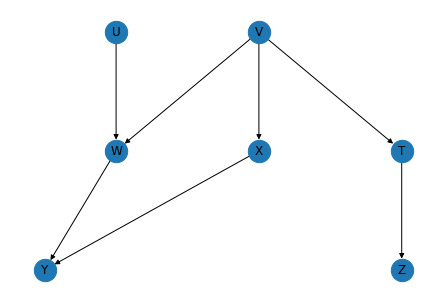

In [ ]:
G2=nx.DiGraph()
G2.add_edges_from([('U','W'),('V','W'),('W','Y'),('X','Y'),
                 ('V','X'),('V','T'),('T','Z')])
pos={'U': (0,0),'V':(1,0),'W': (0,-1),'X': (1,-1),
     'Y':(-0.5,-2),'T':(2,-1),'Z':(2,-2)}
nx.draw(G2,pos=pos,node_size=500)
nx.draw_networkx_labels(G2,pos)
plt.show()

In [ ]:
for path in nx.all_simple_paths(G2.to_undirected(), source='U', target='V'):
    print('ruta : ',path)



ruta :  ['U', 'W', 'Y', 'X', 'V']
ruta :  ['U', 'W', 'V']


In [ ]:
print('U _|_ V   : ',d_separated(G2,{'U'},{'V'},{}))

print('U _|_ V| Y: ',d_separated(G2,{'U'},{'V'},{'Y'}))

print('U _|_ V| X: ',d_separated(G2,{'U'},{'V'},{'X'}))

U _|_ V   :  True
U _|_ V| Y:  False
U _|_ V| X:  True


In [ ]:
for path in nx.all_simple_paths(G2.to_undirected(), source='Y', target='Z'):
    print('ruta : ',path)

ruta :  ['Y', 'W', 'V', 'T', 'Z']
ruta :  ['Y', 'X', 'V', 'T', 'Z']


In [ ]:
print('Y _|_ Z   : ',d_separated(G2,{'Y'},{'Z'},{}))

Y _|_ Z   :  False


In [ ]:
print('Y _|_ Z  | T : ',d_separated(G2,{'Y'},{'Z'},{'T'}))

Y _|_ Z  | T :  True


# Red Asia

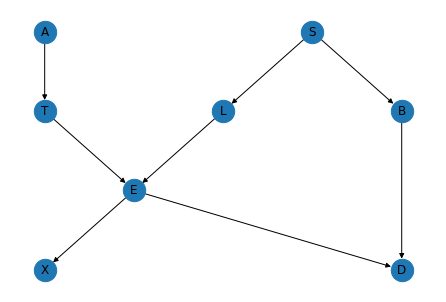

In [ ]:
G3=nx.DiGraph()
G3.add_edges_from([('A','T'),('S','L'),('S','B'),('L','E'),
                 ('T','E'),('E','X'),('E','D'),('B','D')])
pos={'A': (0,0),'S':(1.5,0),'T': (0,-1),'L': (1,-1),
     'B':(2,-1),'E':(0.5,-2),'X':(0,-3),'D':(2,-3)}
nx.draw(G3,pos=pos,node_size=500)
nx.draw_networkx_labels(G3,pos)
plt.show()

In [ ]:
for path in nx.all_simple_paths(G3.to_undirected(), source='T', target='S'):
    print('ruta : ',path)

ruta :  ['T', 'E', 'L', 'S']
ruta :  ['T', 'E', 'D', 'B', 'S']


In [ ]:
for path in nx.all_simple_paths(G3.to_undirected(), source='L', target='B'):
    print('ruta : ',path)

ruta :  ['L', 'S', 'B']
ruta :  ['L', 'E', 'D', 'B']


In [ ]:
# Red Asia

# Libro "Bayesian Reasoning and Machine Learning, p. 51"

print('T _|_ S  | D : ',d_separated(G3,{'T'},{'S'},{'D'}))

print('L _|_ B  | S : ',d_separated(G3,{'L'},{'B'},{'S'}))

print('A _|_ S  | L : ',d_separated(G3,{'A'},{'S'},{'L'}))

print('A _|_ S  | L , D: ',d_separated(G3,{'A'},{'S'},{'L','D'}))

T _|_ S  | D :  False
L _|_ B  | S :  True
A _|_ S  | L :  True
A _|_ S  | L , D:  False


# Red Asia Usando PGMPY

In [ ]:
! pip install --user pgmpy
! pip install --user  wget

     |████████████████████████████████| 327kB 7.5MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=38e4012ecd798acbc160811ffda2fe1e7678115efa47c7ce1df04fee9e674c13
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
from pgmpy.models import BayesianModel

model = BayesianModel([('C', 'E'),
                              ('E', 'F'),
                              ('E', 'D')])

In [ ]:
from pgmpy.factors.discrete import TabularCPD

cpd_c = TabularCPD(variable='C', variable_card=2,
                      values=[[0.8], [0.2]])

cpd_e = TabularCPD(variable='E', variable_card=2,
                      values=[[0.9, 0.7], [0.1, 0.3]],
                      evidence=['C'], evidence_card=[2])

cpd_f = TabularCPD(variable='F', variable_card=2,
                      values=[[0.9, 0.5], [0.1, 0.5]],
                      evidence=['E'], evidence_card=[2])

cpd_d = TabularCPD(variable='D', variable_card=2,
                      values=[[0.7, 0.4], [0.3, 0.6]],
                      evidence=['E'], evidence_card=[2])


In [ ]:
model.add_cpds(cpd_c,cpd_e,cpd_f,cpd_d)

# Checking if the cpds are valid for the model.
model.check_model()

True

In [ ]:
q=model.get_cpds(node='C')
print(q)

+------+-----+
| C(0) | 0.8 |
+------+-----+
| C(1) | 0.2 |
+------+-----+


In [ ]:
q=model.get_cpds(node='D')
print(q)

+------+------+------+
| E    | E(0) | E(1) |
+------+------+------+
| D(0) | 0.7  | 0.4  |
+------+------+------+
| D(1) | 0.3  | 0.6  |
+------+------+------+


In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

In [ ]:
q = infer.query(variables=['E'], evidence={}, joint=False)
for factor in q.values():
    print(factor)

Eliminating: F: 100%|██████████| 3/3 [00:00<00:00, 293.36it/s]

+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.8600 |
+------+----------+
| E(1) |   0.1400 |
+------+----------+


In [ ]:
q = infer.query(variables=['E'], evidence={'D':1}, joint=False)
for factor in q.values():
    print(factor)

Eliminating: F: 100%|██████████| 2/2 [00:00<00:00, 429.06it/s]

+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.7544 |
+------+----------+
| E(1) |   0.2456 |
+------+----------+


In [ ]:
q = infer.query(variables=['C'], evidence={}, joint=False)
for factor in q.values():
    print(factor)

Eliminating: F: 100%|██████████| 3/3 [00:00<00:00, 302.16it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.8000 |
+------+----------+
| C(1) |   0.2000 |
+------+----------+


In [ ]:
import wget
import gzip
f = wget.download('http://www.bnlearn.com/bnrepository/asia/asia.bif.gz')
with gzip.open('asia.bif.gz', mode='rb') as f:
    file_content=f.read()
with open('asia.bif', mode='wb') as f:
    f.write(file_content)

In [ ]:
from pgmpy.readwrite import BIFReader
reader = BIFReader('asia.bif')
!rm asia.bif
!rm asia.bif.gz
model = reader.get_model()

In [ ]:
#reader=BIFReader('data/asia.bif')
#model=reader.get_model()

In [ ]:
model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

In [ ]:
from IPython.display import Image
Image('data/asia.png')

In [ ]:
model.is_active_trail('tub', 'smoke', observed='dysp')

True

In [ ]:
model.is_active_trail('tub', 'smoke')

False

In [ ]:
model.is_active_trail('lung', 'bronc', observed='smoke')

False

In [ ]:
model.is_active_trail('asia', 'smoke', observed='lung')

False

In [ ]:
model.is_active_trail('asia', 'smoke', observed=['lung','dysp'])

True

In [ ]:
model.is_active_trail('lung', 'tub', observed='either')

True

In [ ]:
model.nodes()

NodeView(('asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp'))

In [ ]:
from pgmpy.inference import BeliefPropagation

jtree=BeliefPropagation(model)

In [ ]:
for clique in jtree.get_cliques():
  print(clique)

('xray', 'tub', 'bronc', 'dysp', 'lung', 'either')
('xray', 'tub', 'bronc', 'dysp', 'lung', 'smoke')
('xray', 'tub', 'bronc', 'dysp', 'asia', 'smoke')


In [ ]:
q=model.get_cpds(node='asia')
print(q)

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+


In [ ]:
q=jtree.query(variables=['asia'],evidence={},joint=False)
for factor in q.values():
    print(factor)

Eliminating: tub: 100%|██████████| 5/5 [00:00<00:00, 215.91it/s]

+-----------+-------------+
| asia      |   phi(asia) |
+===========+=============+
| asia(yes) |      0.0100 |
+-----------+-------------+
| asia(no)  |      0.9900 |
+-----------+-------------+


In [ ]:
q=jtree.query(variables=['asia'],evidence={'dysp':1},joint=False)
for factor in q.values():
    print(factor)

Eliminating: smoke: 100%|██████████| 6/6 [00:00<00:00, 249.56it/s]

+-----------+-------------+
| asia      |   phi(asia) |
+===========+=============+
| asia(yes) |      0.0097 |
+-----------+-------------+
| asia(no)  |      0.9903 |
+-----------+-------------+
